In [1]:
import pandas as pd
import nltk

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('csv_all_tokenized.csv')
df = df[df['Classe'].notna()]
df.shape

(472, 14)

In [3]:
df.head()

,Unnamed: 0,ID,UUID,Trip ID,Comment,Rate,Created At,Updated At,User Old ID,Trip Old ID,Classe,Comms,Length,Tokens
0,0,19469,5f090183-575f-4b68-bfd8-8ca64e271f60,NaN,Sans assistance électrique,1.0,2021-09-26T11:30:17.535Z,2021-09-26T11:30:17.535Z,60d193e09485da0e5c6c5c51,6150591710168f3d48342d26,Technique,sans assistance electrique,27,"['sans', 'assistance', 'electrique']"
1,1,19487,79fa4190-76bd-4b48-a6aa-c22b1f5f9355,NaN,Pas de frein arrière,3.0,2021-09-26T14:01:24.832Z,2021-09-26T14:01:24.832Z,608156dcdeb7eb746a8b7ba0,61507aff10168f3d483c51c9,Technique,pas de frein arriere,21,"['pas', 'de', 'frein', 'arriere']"
2,2,31714,7ff43434-065d-4a08-83b2-9a6077c9d0a3,49934.0,Ct génial,0.0,2022-02-21T16:43:55.149001Z,2022-02-21T16:43:55.149001Z,NaN,NaN,Pas technique,ct genial,9,"['ct', 'genial']"
4,4,32873,1d83eae9-2658-4cee-9afe-6f4824d3ec47,51909.0,Vélo très bien mais « vélo rue » du Borrigo av...,3.0,2022-03-09T09:26:07.593932Z,2022-03-09T09:26:07.593932Z,NaN,NaN,Pas technique,velo tres bien mais velo rue du borrigo avec...,83,"['velo', 'tres', 'bien', 'mais', 'velo', 'rue'..."
5,5,19529,3e5191b2-fe94-4914-9288-9d5c33bbb148,NaN,Cool,4.0,2021-09-26T21:09:13.003Z,2021-09-26T21:09:13.003Z,612b5b8cdcb3f875961f7c1b,6150dfb310168f3d4858990c,Pas technique,cool,4,['cool']


In [9]:
X = df['Tokens']
y = df['Classe']

vectorizer = CountVectorizer(max_features=1500)
X = vectorizer.fit_transform(X.ravel()).toarray()

In [10]:
#models = [RandomForestClassifier(),AdaBoostClassifier(), GaussianNB(), KNeighborsClassifier()]
models = {
    "Random Forest": RandomForestClassifier(), 
    "AdaBoost" : AdaBoostClassifier(),
    "GaussianNB" : GaussianNB(),
    "KNN" : KNeighborsClassifier()
}

corriger technicien via pandas ou excel

In [42]:
def evaluate_model(model, X, y, model_name):
    scoring = ['precision_macro', 'recall_macro','f1_macro']
    scores = cross_validate(model, X, y, cv=2, scoring=scoring)
    print(model_name)
    print(scores)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(10,6))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, linewidths=1)
    
    y_test = y_test.map({'Technique': 1, 'Pas technique': 0}).astype(int)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
{'fit_time': array([0.13303304, 0.13199949]), 'score_time': array([0.01396632, 0.01499987]), 'test_precision_macro': array([0.57649443, 0.59260918]), 'test_recall_macro': array([0.56147059, 0.59165181]), 'test_f1_macro': array([0.56828019, 0.59190889])}
               precision    recall  f1-score   support

Pas technique       0.90      0.93      0.91        56
    Technique       0.89      0.85      0.87        39

     accuracy                           0.89        95
    macro avg       0.89      0.89      0.89        95
 weighted avg       0.89      0.89      0.89        95



TypeError: cannot convert the series to <class 'int'>

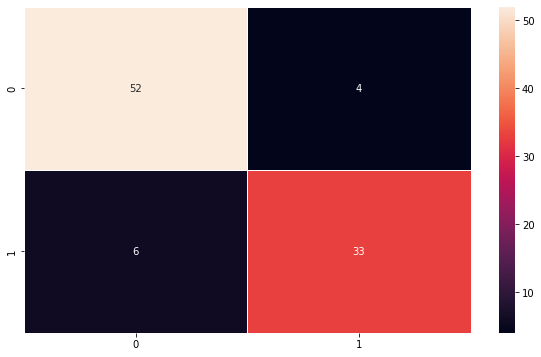

In [34]:
for model_name, model in models.items():
    evaluate_model(models["Random Forest"], X, y, "Random Forest")

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
{'fit_time': array([0.1150341 , 0.10902357]), 'score_time': array([0.01999974, 0.01997471]), 'test_precision_macro': array([0.56976357, 0.59529284]), 'test_recall_macro': array([0.54127451, 0.59593484]), 'test_f1_macro': array([0.55038099, 0.59554731])}
               precision    recall  f1-score   support

Pas technique       0.65      0.95      0.77        56
    Technique       0.79      0.28      0.42        39

     accuracy                           0.67        95
    macro avg       0.72      0.61      0.59        95
 weighted avg       0.71      0.67      0.63        95



TypeError: unsupported operand type(s) for -: 'str' and 'str'

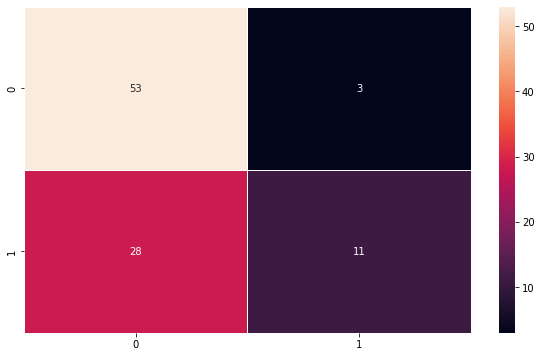

In [29]:
evaluate_model(models["AdaBoost"], X, y, "AdaBoost")

GaussianNB
{'fit_time': array([0.00720906, 0.00400591]), 'score_time': array([0.01397443, 0.01199198]), 'test_precision_macro': array([0.59005021, 0.61367496]), 'test_recall_macro': array([0.57480392, 0.61155674]), 'test_f1_macro': array([0.58215324, 0.61226873])}
               precision    recall  f1-score   support

Pas technique       0.90      0.95      0.92        56
    Technique       0.92      0.85      0.88        39

     accuracy                           0.91        95
    macro avg       0.91      0.90      0.90        95
 weighted avg       0.91      0.91      0.90        95



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: y_true takes value in {'Pas technique', 'Technique'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

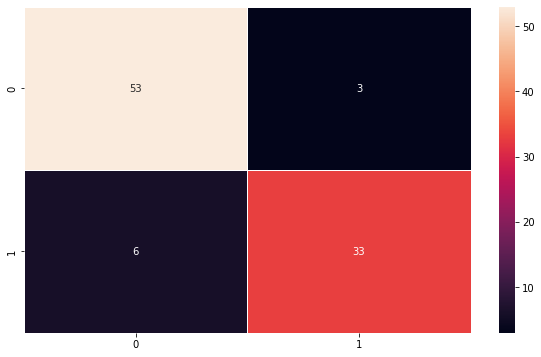

In [20]:
evaluate_model(models["GaussianNB"], X, y, "GaussianNB")

KNN
{'fit_time': array([0.00249577, 0.00299001]), 'score_time': array([0.0240109 , 0.01701045]), 'test_precision_macro': array([0.78324468, 0.55427424]), 'test_recall_macro': array([0.68794118, 0.52493068]), 'test_f1_macro': array([0.68501835, 0.52934415])}
               precision    recall  f1-score   support

Pas technique       0.72      0.96      0.82        56
    Technique       0.90      0.46      0.61        39

     accuracy                           0.76        95
    macro avg       0.81      0.71      0.72        95
 weighted avg       0.79      0.76      0.74        95



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: y_true takes value in {'Pas technique', 'Technique'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

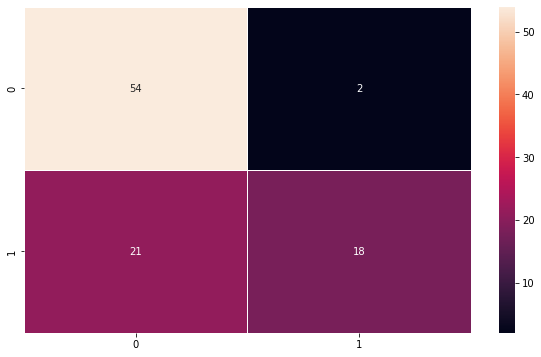

In [21]:
evaluate_model(models["KNN"], X, y, "KNN")

In [ ]:
testtt = pd.read_csv('csv_not_annoted.csv')
testtt.shape

In [ ]:
testtt.head()

In [ ]:
mo